<a href="https://colab.research.google.com/github/sylviahamidah/titanic-machine-learning-from-disaster/blob/main/1.%20EDA%20and%20Feature%20Engineering/EDA_and_Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load Data

In [1]:
! pip install kaggle

from google.colab import drive
drive.mount('/content/drive')

! mkdir ~/.kaggle
! cp /content/drive/MyDrive/Colab_Notebooks/kaggle_API/kaggle.json ~/.kaggle/kaggle.json
! chmod 600 ~/.kaggle/kaggle.json
! kaggle competitions download -c titanic
! unzip /content/titanic.zip

Mounted at /content/drive
  0% 0.00/34.1k [00:00<?, ?B/s]
100% 34.1k/34.1k [00:00<00:00, 42.9MB/s]
Archive:  /content/titanic.zip
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv('/content/train.csv')
dt = pd.read_csv('/content/test.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
dt.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
df.shape, dt.shape

((891, 12), (418, 11))

## Data Pre-Analysis

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Categorical Features

In [8]:
df.describe(include="O")

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


### Numerical Features

In [10]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Missing Values

In [12]:
# display number of missing values
def count_missing_values(data):
    missing = data.isna().sum()
    df = pd.DataFrame({'Count':missing, 'Percentage':np.round(missing/len(data)*100, 2)})
    return df[df['Count'] > 0]

# plot missing values
def plot_missing_values(data):
    missing_df = count_missing_values(data)
    cmap = 'Greys' if len(missing_df) == 0 else 'Greys_r'

    plt.figure(figsize=(12,5))
    sns.heatmap(data.isna().transpose(), cmap=cmap, vmin=0, vmax=1);

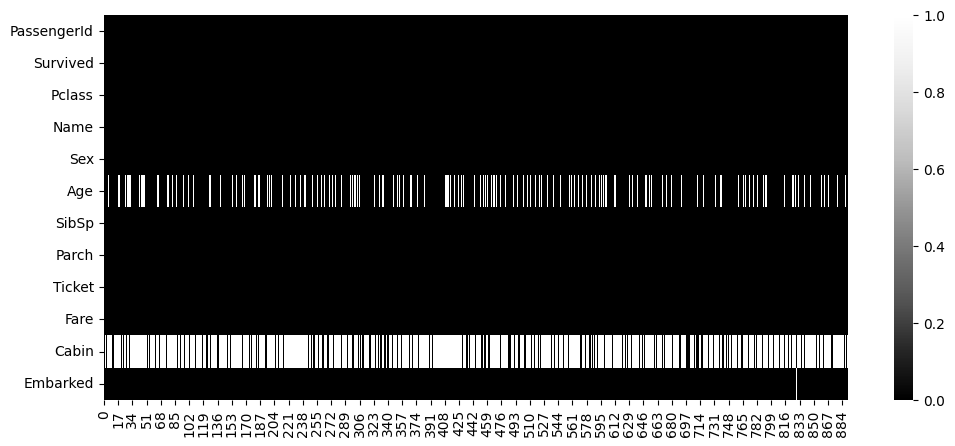

In [13]:
plot_missing_values(df)

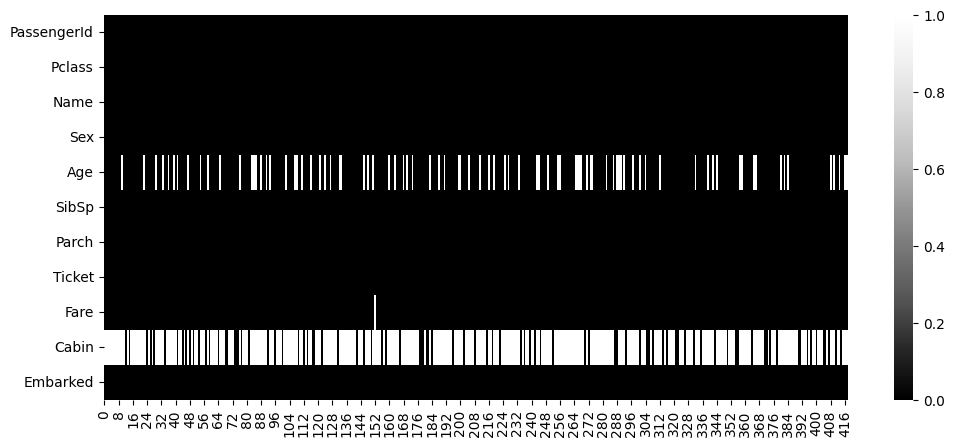

In [14]:
plot_missing_values(dt)

In [15]:
count_missing_values(df)

,Count,Percentage
Age,177,19.87
Cabin,687,77.10
Embarked,2,0.22


In [16]:
count_missing_values(dt)

,Count,Percentage
Age,86,20.57
Fare,1,0.24
Cabin,327,78.23


In [17]:
# Duplicated Data
df[df.duplicated()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [18]:
dt[dt.duplicated()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


## Exploratory Data Analysis

### Class Distribution

In [19]:
df.Survived.value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

### Data Distribution

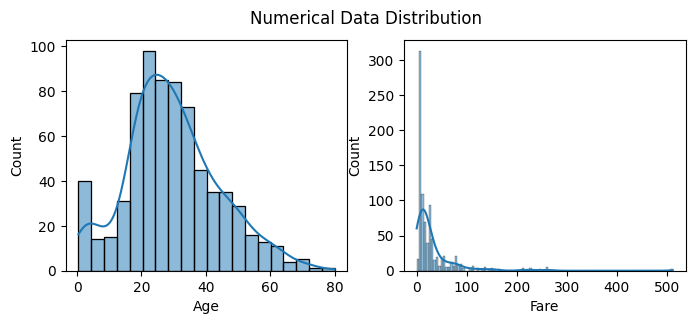

In [22]:
columns = ["Age", "Fare"]

fig, axes = plt.subplots(1, 2, figsize=(8, 3))
for col, ax in zip(columns, axes.flatten()):
    sns.histplot(x=col, data=df, kde=True, ax=ax)

plt.suptitle('Numerical Data Distribution')
plt.show();

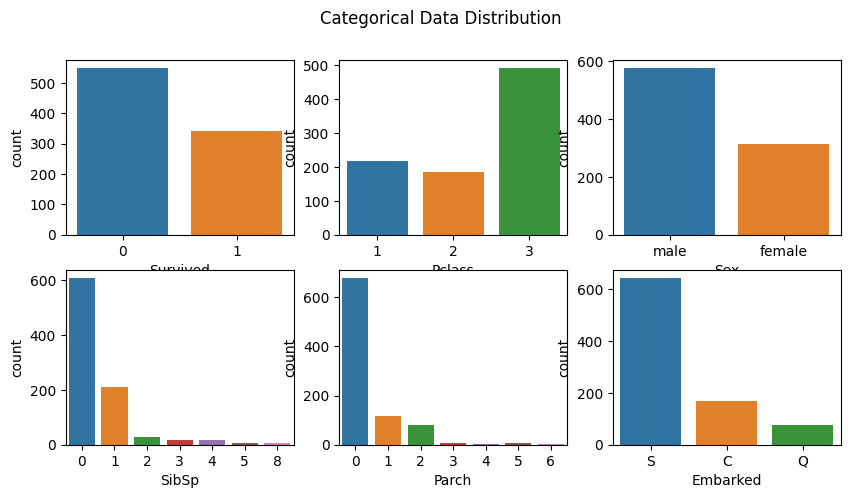

In [23]:
columns = ["Survived", "Pclass", "Sex", "SibSp", "Parch", "Embarked"]

fig, axes = plt.subplots(2, 3, figsize=(10, 5))
for col, ax in zip(columns, axes.flatten()):
    sns.countplot(x=col, data=df, ax=ax)

plt.suptitle('Categorical Data Distribution')
plt.show();

### Features by Target

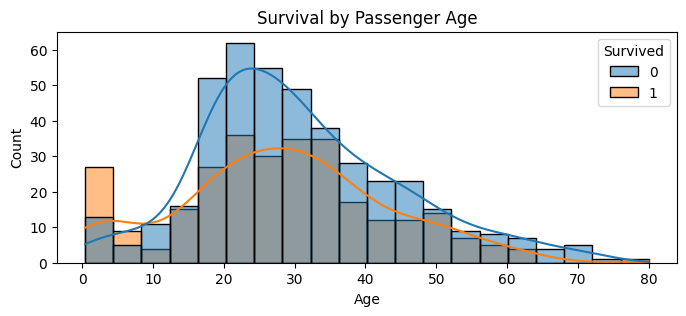

In [25]:
plt.figure(figsize=(8, 3))
sns.histplot(data=df, x='Age', hue='Survived', kde=True)
plt.title('Survival by Passenger Age');

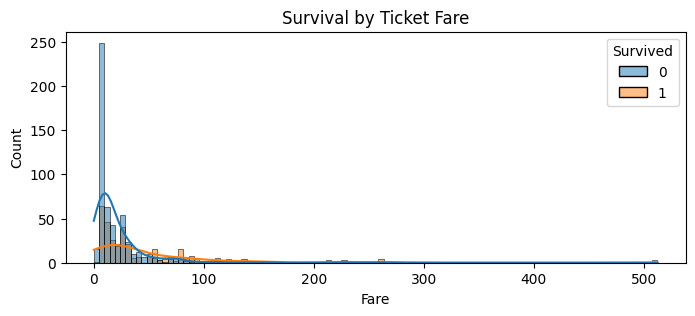

In [27]:
plt.figure(figsize=(8, 3))
sns.histplot(data=df, x='Fare', hue='Survived', kde=True)
plt.title('Survival by Ticket Fare');

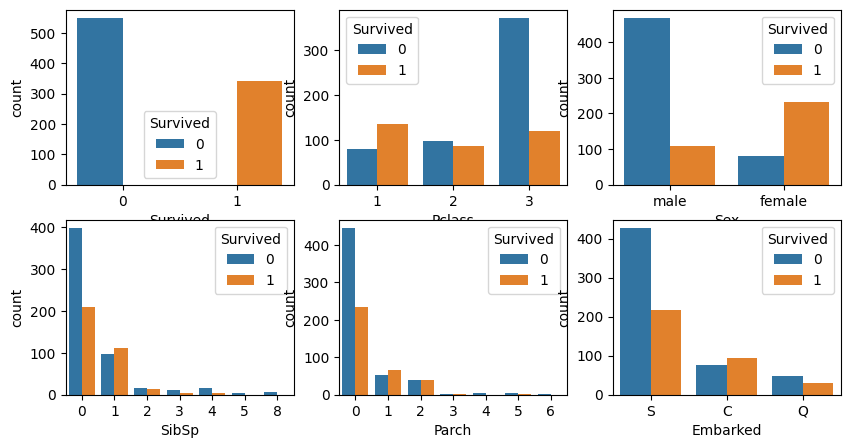

In [28]:
columns = ["Survived", "Pclass", "Sex", "SibSp", "Parch", "Embarked"]

fig, axes = plt.subplots(2, 3, figsize=(10, 5))
for col, ax in zip(columns, axes.flatten()):
    sns.countplot(x=col, data=df, hue="Survived", ax=ax)

### Correlation Analysis

In [29]:
def plot_correlation_matrix(data, columns, figsize=(8,4)):
    corr = data[columns].corr()
    mask = np.triu(np.ones_like(corr, dtype=bool))

    plt.figure(figsize=figsize)
    sns.heatmap(corr, annot=True, cmap='RdGy_r', mask=mask, vmin=-1, vmax=1)
    plt.title('Correlation Matrix of Passenger Data (Numerics only)')
    plt.yticks(rotation=0)
    plt.show()

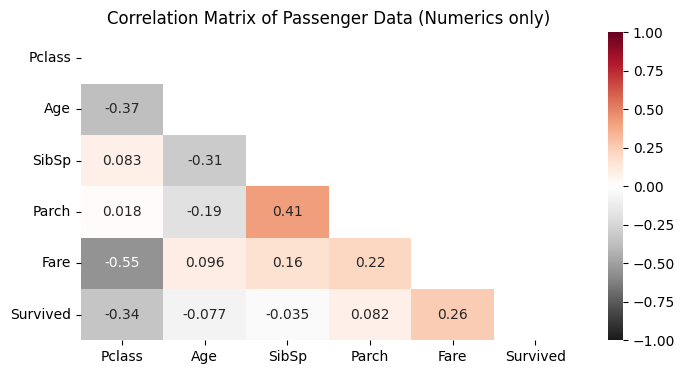

In [30]:
num_cols = "Pclass Age SibSp Parch Fare Survived".split()
plot_correlation_matrix(df, num_cols)

In [31]:
from scipy.stats import chi2_contingency

def plot_categorical_correlation_matrix(data, columns, figsize=(8, 4)):
    corr = pd.DataFrame(index=columns, columns=columns, dtype=np.float64)

    for col1 in columns:
        for col2 in columns:
            if col1 == col2:
                corr.loc[col1, col2] = 1.0
            else:
                cross_tab = pd.crosstab(data[col1], data[col2])
                chi2 = chi2_contingency(cross_tab)[0]
                min_dim = min(cross_tab.shape) - 1
                corr.loc[col1, col2] = np.sqrt(chi2 / (chi2 + data.shape[0] * min_dim))

    mask = np.triu(np.ones_like(corr, dtype=bool))

    plt.figure(figsize=figsize)
    sns.heatmap(corr, annot=True, cmap='Reds', mask=mask, vmin=0, vmax=1)
    plt.title('Categorical Association Matrix')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.show()

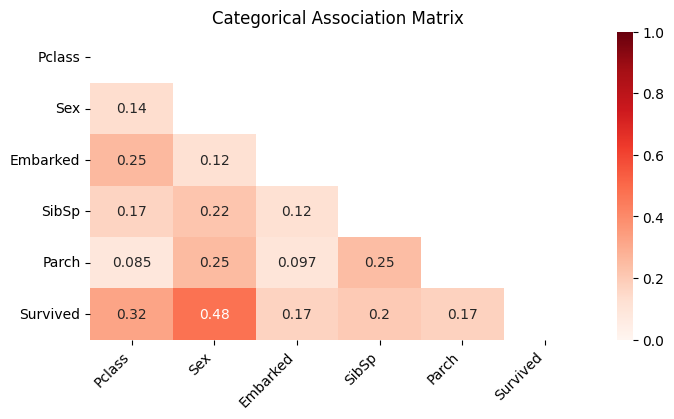

In [32]:
cat_cols = ['Pclass', 'Sex', 'Embarked', 'SibSp', 'Parch', 'Survived']
plot_categorical_correlation_matrix(df, cat_cols)

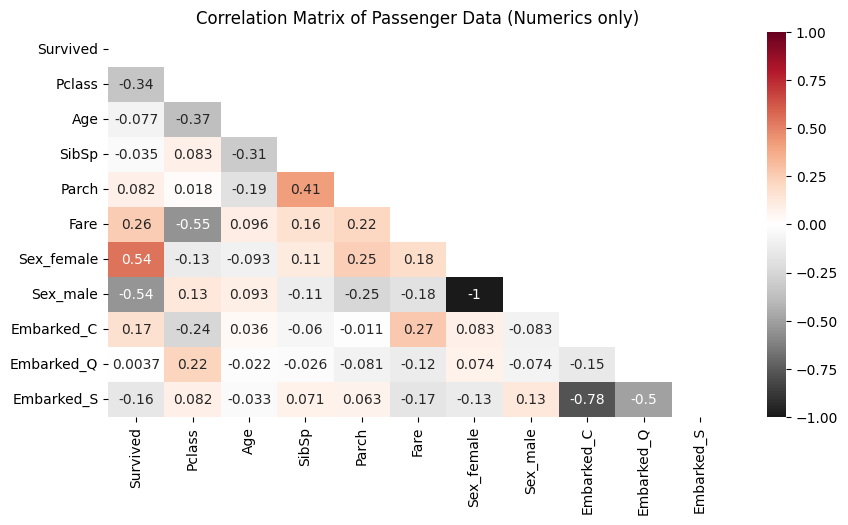

In [34]:
drop_cols = ['PassengerId', 'Name', 'Cabin', 'Ticket']

# encode the categorical features then show correlaion matrix for all features (now all numerics)
df2 = pd.get_dummies(df.drop(columns=drop_cols), columns=['Sex', 'Embarked'])
plot_correlation_matrix(df2, df2.columns, figsize=(10,5))

## Feature Engineering

In [67]:
# new dataframe for results of feature engineering
df_fe = df.copy()
dt_fe = dt.copy()

### Categorizing Age

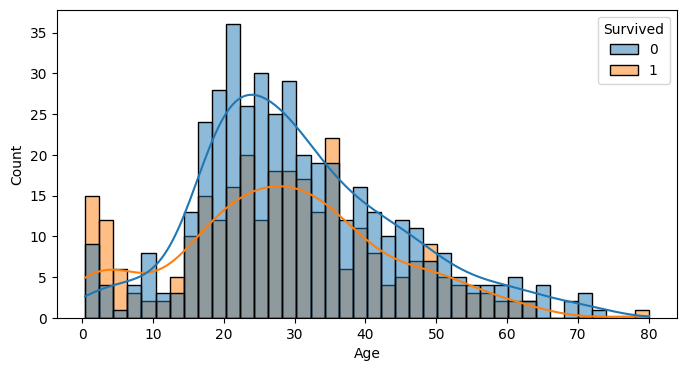

In [68]:
plt.figure(figsize=(8,4))
sns.histplot(data=df_fe, x='Age', hue='Survived', bins=40, kde=True);

In [69]:
# group age based on bins division
bins = [-np.Inf, 1, 6, 14, 19, 55, np.Inf]
labels = ["Baby","Toddler","Kid","Teenage","GrownUp","Elder"]

df_fe["Age_Cat"] = pd.cut(x=df_fe["Age"], bins=bins, labels=labels, include_lowest=True)
dt_fe["Age_Cat"] = pd.cut(x=dt_fe["Age"], bins=bins, labels=labels, include_lowest=True)

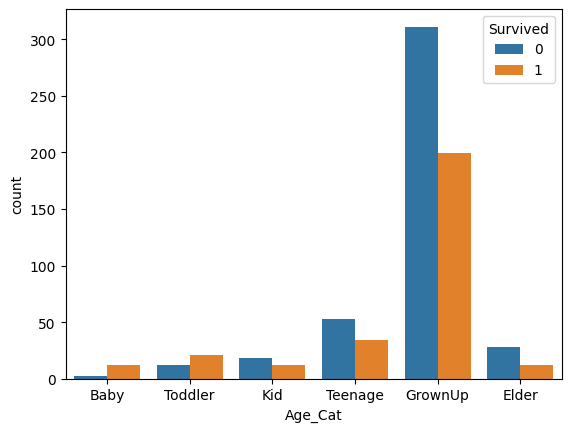

In [70]:
sns.countplot(x="Age_Cat", data=df_fe, hue="Survived");

### Categorizing Fare

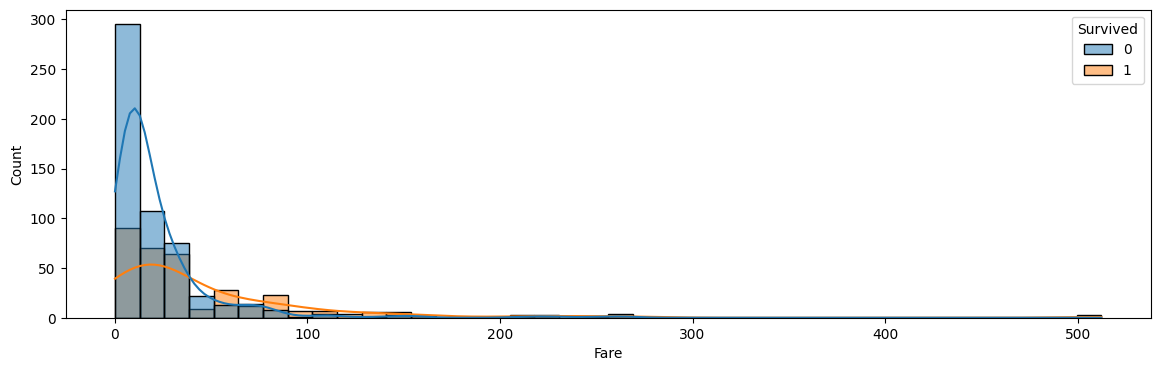

In [71]:
plt.figure(figsize=(14,4))
sns.histplot(data=df_fe, x='Fare', hue='Survived', bins=40, kde=True);

In [72]:
bins = [-np.Inf, 20, 50, np.Inf]
labels = ["Low","Medium","High"]
df_fe["Fare_Cat"] = pd.cut(x=df_fe["Fare"], bins=bins, labels=labels, include_lowest=True)
dt_fe["Fare_Cat"] = pd.cut(x=dt_fe["Fare"], bins=bins, labels=labels, include_lowest=True)

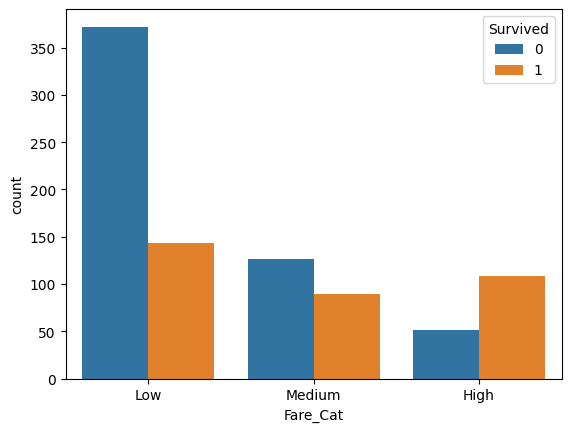

In [73]:
sns.countplot(x="Fare_Cat", data=df_fe, hue="Survived");

### Extracting Title from Name

In [74]:
df_fe["Name"]

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [75]:
def find_title(name):
    return (name.split(", ")[1]).split(".")[0]

df_fe["Name"].apply(find_title).value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Name, dtype: int64

In [76]:
def extract_title(name):
    title = find_title(name)
    return title if title in "Mr Miss Mrs Master".split(" ") else "Others"

df_fe["Title"] = df_fe["Name"].apply(extract_title)
dt_fe["Title"] = dt_fe["Name"].apply(extract_title)

In [77]:
df_fe.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Cat,Fare_Cat,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,GrownUp,Low,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,GrownUp,High,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,GrownUp,Low,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,GrownUp,High,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,GrownUp,Low,Mr


### Combining SibSp and Parch into Family

In [78]:
def count_family(data):
    return data["SibSp"] + data["Parch"] + 1

df_fe["Family"] = df_fe.apply(count_family, axis=1)
dt_fe["Family"] = dt_fe.apply(count_family, axis=1)

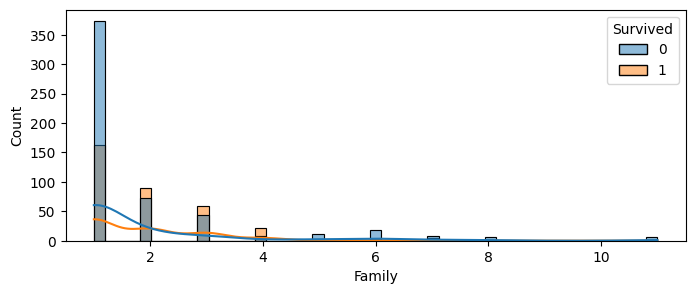

In [79]:
# Categorizing Family Size
plt.figure(figsize=(8,3))
sns.histplot(data=df_fe, x='Family', hue='Survived', kde=True);

In [80]:
# group family based on bins division
bins = [-np.Inf, 1, 4, np.Inf]
labels = ["Single","Small","Big"]
df_fe["Family_Cat"] = pd.cut(x=df_fe["Family"], bins=bins, labels=labels)
dt_fe["Family_Cat"] = pd.cut(x=dt_fe["Family"], bins=bins, labels=labels)

## Modified Data

In [81]:
df_fe.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Cat,Fare_Cat,Title,Family,Family_Cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,GrownUp,Low,Mr,2,Small
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,GrownUp,High,Mrs,2,Small
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,GrownUp,Low,Miss,1,Single
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,GrownUp,High,Mrs,2,Small
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,GrownUp,Low,Mr,1,Single


In [82]:
dt_fe.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Cat,Fare_Cat,Title,Family,Family_Cat
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,GrownUp,Low,Mr,1,Single
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,GrownUp,Low,Mrs,2,Small
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Elder,Low,Mr,1,Single
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,GrownUp,Low,Mr,1,Single
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,GrownUp,Low,Mrs,3,Small


In [83]:
df_fe.shape, dt_fe.shape

((891, 17), (418, 16))

In [84]:
df_fe.to_csv('train_fe.csv', index=False)
dt_fe.to_csv('test_fe.csv', index=False)